<a href="https://colab.research.google.com/github/praneetheddu/LDL/blob/main/tutorials/Regression_and_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import logging

In [3]:
EPOCHS = 500
BATCH_SIZE  = 16

In [4]:
boston_housing_dataset = keras.datasets.boston_housing
(raw_x_train, y_train),(raw_x_test, y_test) = boston_housing_dataset.load_data()  

In [8]:
x_train = (raw_x_train - np.mean(raw_x_train, axis=0)) / np.std(raw_x_train, axis=0)
x_test = (raw_x_test - np.mean(raw_x_test, axis=0)) / np.std(raw_x_test, axis=0)

In [6]:
model = Sequential()
model.add(Dense(64,  activation='relu', input_shape=[13]))
model.add(Dense(64,  activation='relu'))
model.add(Dense(1,  activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam', 
              metrics=['mean_absolute_error'])
model.summary() # Show network architecture


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                896       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Train the model 
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=EPOCHS, batch_size=BATCH_SIZE,
                    verbose=True, shuffle=True)

Epoch 1/500
26/26 [==============================] - 1s 10ms/step - loss: 552.0030 - mean_absolute_error: 21.5263 - val_loss: 518.9413 - val_mean_absolute_error: 20.7646
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 426.8179 - mean_absolute_error: 18.4113 - val_loss: 354.8932 - val_mean_absolute_error: 16.5608
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 236.7866 - mean_absolute_error: 12.9286 - val_loss: 149.3100 - val_mean_absolute_error: 10.3529
Epoch 4/500
26/26 [==============================] - 0s 4ms/step - loss: 94.5755 - mean_absolute_error: 7.3478 - val_loss: 73.9010 - val_mean_absolute_error: 6.6958
Epoch 5/500
26/26 [==============================] - 0s 4ms/step - loss: 55.2089 - mean_absolute_error: 5.4428 - val_loss: 45.5225 - val_mean_absolute_error: 5.1173
Epoch 6/500
26/26 [==============================] - 0s 4ms/step - loss: 35.9404 - mean_absolute_error: 4.2719 - val_loss: 33.3105 - val_mean_absolute_error: 4.39

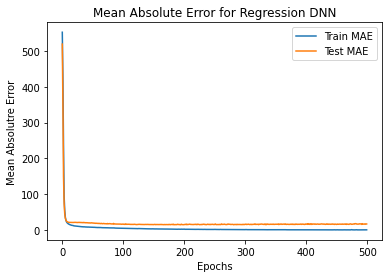

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
line1, = ax.plot(history.history['loss'], label='Train MAE')
line2, = ax.plot(history.history['val_loss'], label='Test MAE')
legend1 = ax.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolutre Error')
plt.title('Mean Absolute Error for Regression DNN')
plt.show()

In [21]:
# Further avoid overfitting by Regularization and dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Dense(64,  activation='relu',  kernel_regularizer=l2(0.1),
                bias_regularizer=l2(0.1),input_shape=[13]))
model.add(Dropout(0.2))
model.add(Dense(64,  activation='relu',  kernel_regularizer=l2(0.1),
                bias_regularizer=l2(0.1)))
model.add(Dropout(0.2))
model.add(Dense(1,  activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam', 
              metrics=['mean_absolute_error'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                896       
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Train the model 
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=EPOCHS, batch_size=BATCH_SIZE,
                    verbose=True, shuffle=True)

Epoch 1/500
26/26 [==============================] - 1s 10ms/step - loss: 534.1396 - mean_absolute_error: 20.9875 - val_loss: 488.0682 - val_mean_absolute_error: 19.9978
Epoch 2/500
26/26 [==============================] - 0s 4ms/step - loss: 384.1694 - mean_absolute_error: 17.2490 - val_loss: 301.9323 - val_mean_absolute_error: 15.2260
Epoch 3/500
26/26 [==============================] - 0s 4ms/step - loss: 190.8923 - mean_absolute_error: 11.1678 - val_loss: 115.7316 - val_mean_absolute_error: 8.8194
Epoch 4/500
26/26 [==============================] - 0s 4ms/step - loss: 86.9853 - mean_absolute_error: 6.7334 - val_loss: 64.5146 - val_mean_absolute_error: 5.8883
Epoch 5/500
26/26 [==============================] - 0s 4ms/step - loss: 67.0588 - mean_absolute_error: 5.5889 - val_loss: 49.3459 - val_mean_absolute_error: 4.8372
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 51.0298 - mean_absolute_error: 4.7809 - val_loss: 42.7502 - val_mean_absolute_error: 4.316

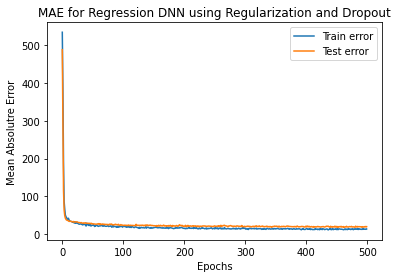

In [20]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
line1, = ax.plot(history.history['loss'], label='Train error')
line2, = ax.plot(history.history['val_loss'], label='Test error')
legend1 = ax.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolutre Error')
plt.title('MAE for Regression DNN using Regularization and Dropout')
plt.show()

In [22]:
# Creating a deeper model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Dense(128,  activation='relu',  kernel_regularizer=l2(0.1),
                bias_regularizer=l2(0.1),input_shape=[13]))
model.add(Dropout(0.2))
model.add(Dense(128,  activation='relu',  kernel_regularizer=l2(0.1),
                bias_regularizer=l2(0.1)))
model.add(Dropout(0.2))
model.add(Dense(64,  activation='relu',  kernel_regularizer=l2(0.1),
                bias_regularizer=l2(0.1)))
model.add(Dropout(0.2))
model.add(Dense(1,  activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam', 
              metrics=['mean_absolute_error'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               1792      
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 128)               16512     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_15 (Dense)            (None, 1)                

In [23]:
# Train the model 
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=EPOCHS, batch_size=BATCH_SIZE,
                    verbose=True, shuffle=True)

Epoch 1/500
26/26 [==============================] - 1s 11ms/step - loss: 487.7155 - mean_absolute_error: 19.3624 - val_loss: 296.9695 - val_mean_absolute_error: 14.4534
Epoch 2/500
26/26 [==============================] - 0s 4ms/step - loss: 148.2108 - mean_absolute_error: 8.5267 - val_loss: 66.1574 - val_mean_absolute_error: 5.0422
Epoch 3/500
26/26 [==============================] - 0s 4ms/step - loss: 67.2526 - mean_absolute_error: 4.9803 - val_loss: 49.2407 - val_mean_absolute_error: 4.0204
Epoch 4/500
26/26 [==============================] - 0s 4ms/step - loss: 58.1437 - mean_absolute_error: 4.5631 - val_loss: 46.2948 - val_mean_absolute_error: 3.6088
Epoch 5/500
26/26 [==============================] - 0s 5ms/step - loss: 52.9223 - mean_absolute_error: 4.1233 - val_loss: 43.7392 - val_mean_absolute_error: 3.4047
Epoch 6/500
26/26 [==============================] - 0s 4ms/step - loss: 50.9926 - mean_absolute_error: 4.0618 - val_loss: 43.5946 - val_mean_absolute_error: 3.4299
Epoc

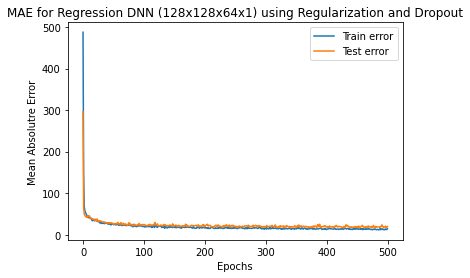

In [25]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
line1, = ax.plot(history.history['loss'], label='Train error')
line2, = ax.plot(history.history['val_loss'], label='Test error')
legend1 = ax.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolutre Error')
plt.title('MAE for Regression DNN (128x128x64x1) using Regularization and Dropout')
plt.show()